<a href="https://colab.research.google.com/github/jotaperes/Bootcamp-IGTI-DATA-SCIENCE/blob/main/Modelo_de_Regress%C3%A3o%20Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando biblitecas**

In [2]:
import pandas as pd # biblioteca para manipulação de dados
import numpy as np # biblioteca para funções de alto nível
import plotly.express as px # biblioteca para criar gráficos dinâmicos
import seaborn as sns # biblioteca para gráficos
import matplotlib.pyplot as plt 

dados = pd.read_csv("custo_diaria.csv", sep = ';') # Cria o dataset


In [3]:
dados.head() # Verificando a composição do banco

,qtd_pessoas,valor_diaria
0,1,150
1,3,200
2,4,650
3,6,499
4,7,549


In [4]:
dados.describe() # Verificando a composição do banco. Ação importante para entender profundamente o dado à disposição.

,qtd_pessoas,valor_diaria
count,30.000000,30.000000
mean,28.600000,1648.633333
std,18.189804,950.522197
min,1.000000,150.000000
25%,13.500000,869.250000
50%,26.000000,1627.500000
75%,44.500000,2497.000000
max,60.000000,3300.000000


In [5]:
X = dados['qtd_pessoas'].values # cria duas variáveis para facilitar a manipulação posteriormente
Y = dados['valor_diaria'].values # A variável X é a variável independente e a Y é a dependente

In [6]:
np.corrcoef(X, Y) # Cria uma matriz que indica a correlação entre as variáveis.

array([[1.        , 0.97866601],
       [0.97866601, 1.        ]])

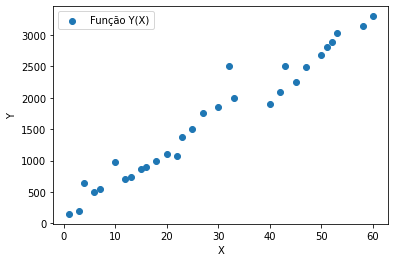

In [7]:
plt.scatter(X,Y,label='Função Y(X)'); # Cria o gráfico scatter para visualizarmos a relação entre as variáveis
plt.xlabel('X'); # Define o valor que será visualizado no label x
plt.ylabel('Y');
plt.legend(); 

In [8]:
X = X.reshape(-1,1) # É necessário criar uma matriz para podermos aplicar a regressão
X

array([[ 1],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [10],
       [12],
       [13],
       [15],
       [16],
       [20],
       [18],
       [22],
       [23],
       [25],
       [27],
       [30],
       [32],
       [33],
       [40],
       [42],
       [43],
       [45],
       [47],
       [50],
       [51],
       [52],
       [53],
       [58],
       [60]])

In [9]:
from sklearn.linear_model import LinearRegression # Importa as funções necessárias a regressão linear
# cria um objeto do tipo regressão linear
previsao_custo_diaria = LinearRegression()

In [10]:
type(previsao_custo_diaria)

sklearn.linear_model._base.LinearRegression

In [11]:
previsao_custo_diaria.fit(X, Y) # Cria o modelo a partir das variáveis informadas

LinearRegression()

In [12]:
previsao_custo_diaria.intercept_ # Verificando onde é o intercept ou alfa, da fórmula de regressão

186.00229281307384

In [13]:
previsao_custo_diaria.coef_ # Verificando onde é o coeficiente angular ou o beta, da fórmula de regressão

array([51.14094547])

In [14]:
previsao_preco = previsao_custo_diaria.predict(X) # A partir dos preços, vamos estimar/prever o custo
previsao_preco

array([ 237.14323829,  339.42512923,  390.5660747 ,  492.84796565,
        543.98891112,  697.41174754,  799.69363849,  850.83458396,
        953.1164749 , 1004.25742038, 1208.82120227, 1106.53931132,
       1311.10309321, 1362.24403869, 1464.52592963, 1566.80782058,
       1720.230657  , 1822.51254794, 1873.65349341, 2231.64011172,
       2333.92200267, 2385.06294814, 2487.34483909, 2589.62673003,
       2743.04956645, 2794.19051192, 2845.3314574 , 2896.47240287,
       3152.17713023, 3254.45902118])

In [ ]:
X.ravel() # transforma em um vetor para poder fazer a visualização em gráfico

array([ 150,  200,  650,  499,  549,  980,  700,  735,  859,  900, 1100,
        989, 1075, 1378, 1500, 1755, 1850, 2500, 2000, 1900, 2089, 2500,
       2250, 2488, 2680, 2803, 2890, 3040, 3150, 3300])

In [ ]:
grafico = px.scatter(x = X.ravel(), y = Y)
grafico

In [ ]:
grafico = px.scatter(x = X.ravel(), y = Y)
grafico.add_scatter(x = X.ravel(), y = previsao_preco, name = 'Previsões')
grafico

In [ ]:
qtd_pessoas = 50
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas # fórmula para prever/estimar o valor

array([2743.04956645])

In [18]:
previsao_custo_diaria.predict([[17]]) # Também é possível fazer a previsão a partir dessa função.

array([1055.39836585])

In [ ]:
previsao_custo_diaria.score(X, Y) # Verifica a pontuação do modelo, quanto mais próximo de 1, melhor

0.9577871649322629

O **erro quadrático médio (MSE)** ou desvio quadrático 
médio (MSD) de um estimador que mede a média dos quadrados dos erros é 
a diferença média quadrática entre os valores estimados e o valor real.

RMSE **(root mean squared error)** é a medida que calcula "a raiz 
quadrática média" dos erros entre valores observados (reais) e predições 
(hipóteses).

**MAE (mean absolut error)** calcula o "erro absoluto médio" dos erros 
entre valores observados (reais) e predições (hipóteses). 

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error # Importa as funções

MSE = mean_squared_error(Y, previsao_preco)
MAE = mean_absolute_error(Y, previsao_preco)
RMSE = np.sqrt(MSE)

print("MSE = {:0.2f}".format(MSE))
print("MAE = {:0.2f}".format(MAE))
print("RMSE = {:0.2f}".format(RMSE))

MSE = 36867.68
MAE = 138.91
RMSE = 192.01
